In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras import Model
 
from tensorflow.keras.applications.vgg16 import VGG16
 
from tensorflow.keras.models import Model,Sequential
 
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,GlobalAveragePooling2D,Layer,Input,Lambda
from tensorflow.keras.optimizers import RMSprop , Adam , Adamax , Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

from keras.utils import np_utils
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# re-size all the images to standard size 224 x 224
IMAGE_SIZE = [224, 224]

# specifying path for train and test data folders
train_path = 'C:/Ajay/documents/Major project/data/train'
valid_path = 'C:/Ajay/documents/Major project/data/test'

In [3]:
# Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
# Addition of data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True)

In [4]:
# validation data should not be augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Ajay/documents/Major project/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Ajay/documents/Major project/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [5]:
# from keras.applications.resnet import ResNet50
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resmodel = Sequential()
# resmodel.add(resnet_model)
# resmodel.add(GlobalAveragePooling2D())
# resmodel.add(Dense(256, activation='relu'))
# resmodel.add(Dense(2, activation='sigmoid'))
# for layer in resnet_model.layers:
#     layer.trainable = False

In [6]:
from keras.applications.resnet import ResNet50
resmodel = Sequential()
resmodel.add(ResNet50(include_top=False,input_tensor=None,input_shape=(224,224,3),pooling='avg',classes=2,weights='imagenet'))
resmodel.add(Flatten())
resmodel.add(Dense(256, activation='relu'))
resmodel.add(Dropout(0.5))
resmodel.add(BatchNormalization())
resmodel.add(Dense(128, activation='relu'))
resmodel.add(Dropout(0.5))
resmodel.add(BatchNormalization())
resmodel.add(Dense(2, activation='sigmoid'))

resmodel.layers[0].trainable = False
resmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
resmodel.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.7)

In [9]:
history = resmodel.fit(
        training_set,
        validation_data=test_set,
        epochs= 30,
        verbose=1,
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set),
        callbacks=[red_lr]
                      )

Epoch 1/30
83/83 [==============================] - 34s 325ms/step - loss: 0.8443 - accuracy: 0.5093 - val_loss: 0.6887 - val_accuracy: 0.5455
Epoch 2/30
83/83 [==============================] - 25s 294ms/step - loss: 0.7999 - accuracy: 0.5123 - val_loss: 0.7365 - val_accuracy: 0.5455
Epoch 3/30
83/83 [==============================] - 24s 289ms/step - loss: 0.7729 - accuracy: 0.5154 - val_loss: 0.7786 - val_accuracy: 0.5455
Epoch 4/30
83/83 [==============================] - 24s 288ms/step - loss: 0.7412 - accuracy: 0.5290 - val_loss: 0.8043 - val_accuracy: 0.5455

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 5/30
83/83 [==============================] - 25s 301ms/step - loss: 0.7339 - accuracy: 0.5336 - val_loss: 0.8472 - val_accuracy: 0.5455
Epoch 6/30
83/83 [==============================] - 24s 294ms/step - loss: 0.7141 - accuracy: 0.5571 - val_loss: 0.8483 - val_accuracy: 0.5455
Epoch 7/30
83/83 [==============================] - 25s 295ms

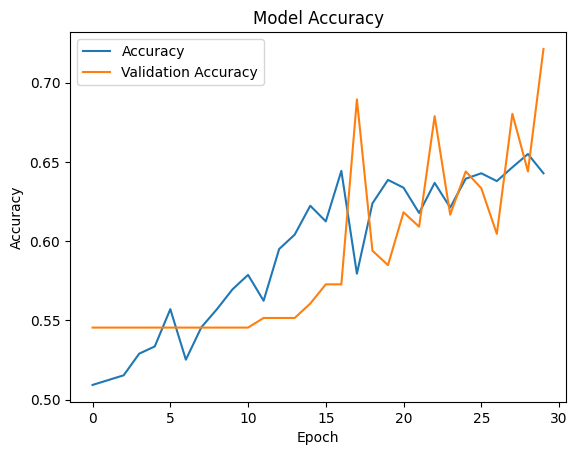

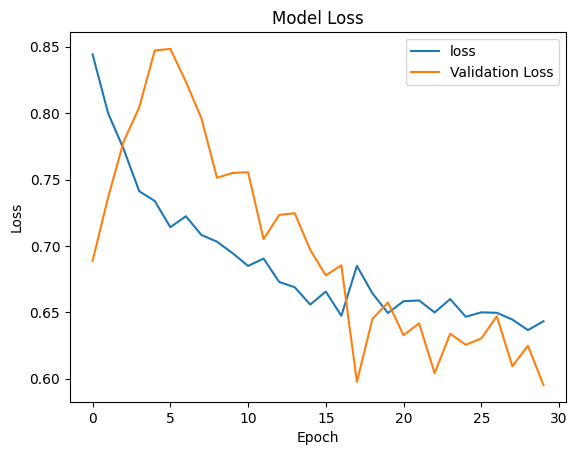

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [11]:
X_test, y_test = next(test_set)

In [12]:
print("Loss of the model is - " , resmodel.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , resmodel.evaluate(X_test,y_test)[1]*100 , "%")

1/1 [==============================] - 1s 1s/step - loss: 0.5685 - accuracy: 0.7812
Loss of the model is -  0.5684871077537537
1/1 [==============================] - 0s 111ms/step - loss: 0.5685 - accuracy: 0.7812
Accuracy of the model is -  78.125 %


In [13]:
from keras.models import load_model

# save the fine tuned model
resmodel.save('resnet.h5')

C:\Users\AJAY\anaconda3\envs\tf\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
